MINI PROJECT DATA ANALYST

In [6]:
%matplotlib inline

In [ ]:
1 Check the list

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

In [8]:
df = pd.read_excel('US Superstore data.xls')

In [9]:
import matplotlib
print(matplotlib.get_backend())

module://matplotlib_inline.backend_inline


In [35]:
# Quick check of data
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [10]:
# Check for missing values
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [38]:
# Nettoyage des données
df.drop_duplicates(inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

Main Variables:

Transactional Data: (sales, profit, quantity, discount, etc.)
Customer Data: (name, segment, etc.)
Geographical Data: (city, state, region)
Product Data: (category, sub-category, product name)

In [11]:
import matplotlib.pyplot as plt

def mon_plot(x, y): 
    plt.bar(x, y) 
    plt.ylim(0, 12) 
plt.show()

2. Geographical Analysis: Sales by States

/var/folders/xh/330hhznn65g8ndgfy8rh7gkw0000gn/T/ipykernel_6347/2110706535.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_state.reset_index(), x='State', y='Profit', palette='coolwarm')


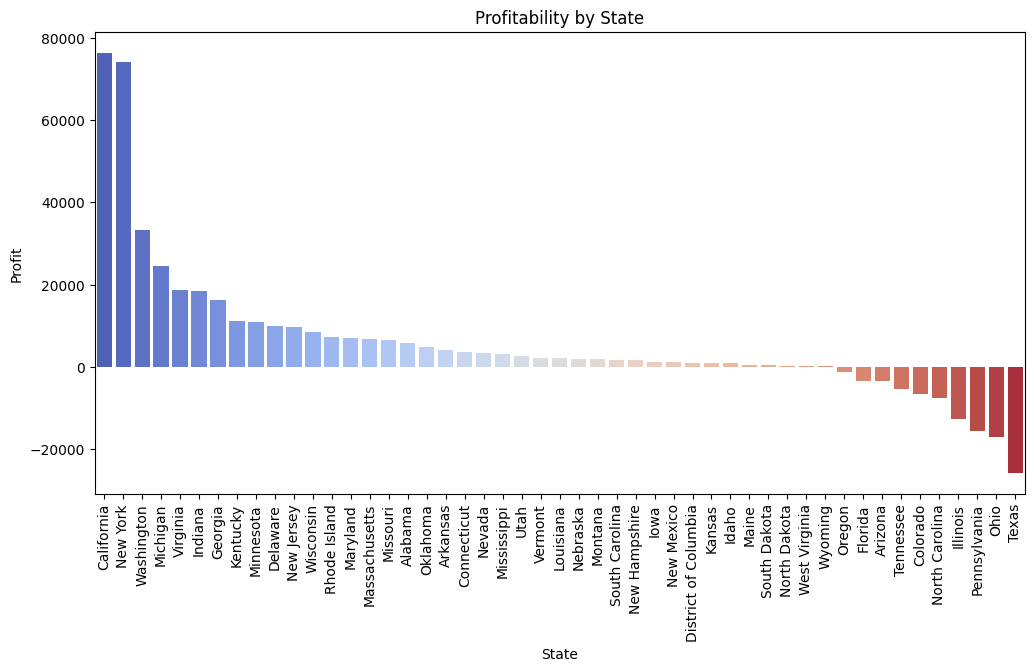

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_profitability_by_state():
    profit_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False)
    plt.figure(figsize=(12,6))
    sns.barplot(data=profit_state.reset_index(), x='State', y='Profit', palette='coolwarm')
    plt.title('Profitability by State')
    plt.xlabel('State')
    plt.ylabel('Profit')
    plt.xticks(rotation=90)  
    plt.show()

plot_profitability_by_state()

This graph illustrates the deduction of profitability across different states. The data shows that California has the highest profit, while Texas has the lowest, indicating a significant variation in profitability among states. The color gradient from blue to red visually emphasizes the transition from highly profitable states to those with negative profitability.

NEW YORK VS CALIFORNIA

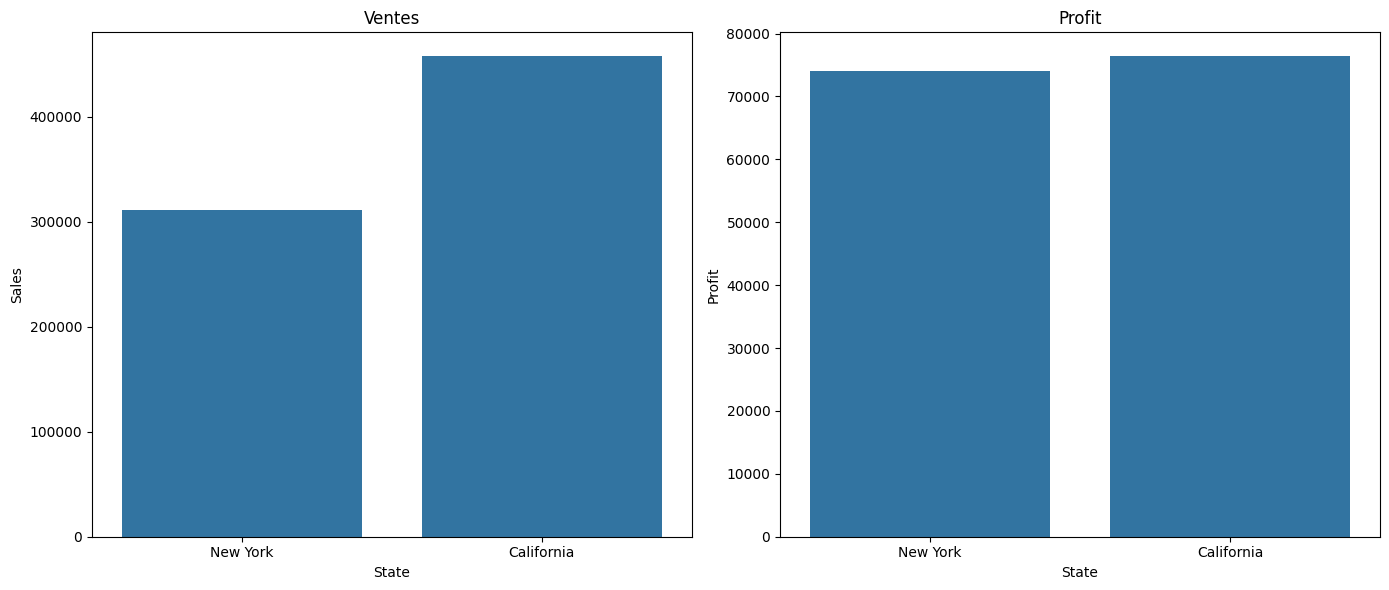

In [47]:
states = ['New York', 'California']
df_states = df[df['State'].isin(states)]

summary = df_states.groupby('State')[['Sales', 'Profit']].sum().reset_index()

# Inverser l'ordre des états pour le graphique
summary['State'] = pd.Categorical(summary['State'], categories=summary['State'][::-1], ordered=True)

fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(data=summary, x='State', y='Sales', ax=ax[0])
ax[0].set_title('Ventes')
sns.barplot(data=summary, x='State', y='Profit', ax=ax[1])
ax[1].set_title('Profit')
plt.tight_layout()
plt.show()

This side-by-side bar chart compares sales and profit for New York and California. The left graph shows that California has higher sales than New York, with sales reaching around 320,000 compared to about 310,000 for New York. The right graph indicates that profit is also higher in California, approximately 76,000, while New York's profit is slightly lower, around 74,000. Overall, California outperforms New York in both sales and profit, highlighting its stronger market performance.

TOP CITIES SALES

/var/folders/xh/330hhznn65g8ndgfy8rh7gkw0000gn/T/ipykernel_97080/1827858728.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sales.values, y=top_sales.index, ax=axes[0], palette='Blues_r')
/var/folders/xh/330hhznn65g8ndgfy8rh7gkw0000gn/T/ipykernel_97080/1827858728.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profit.values, y=top_profit.index, ax=axes[1], palette='Greens_r')


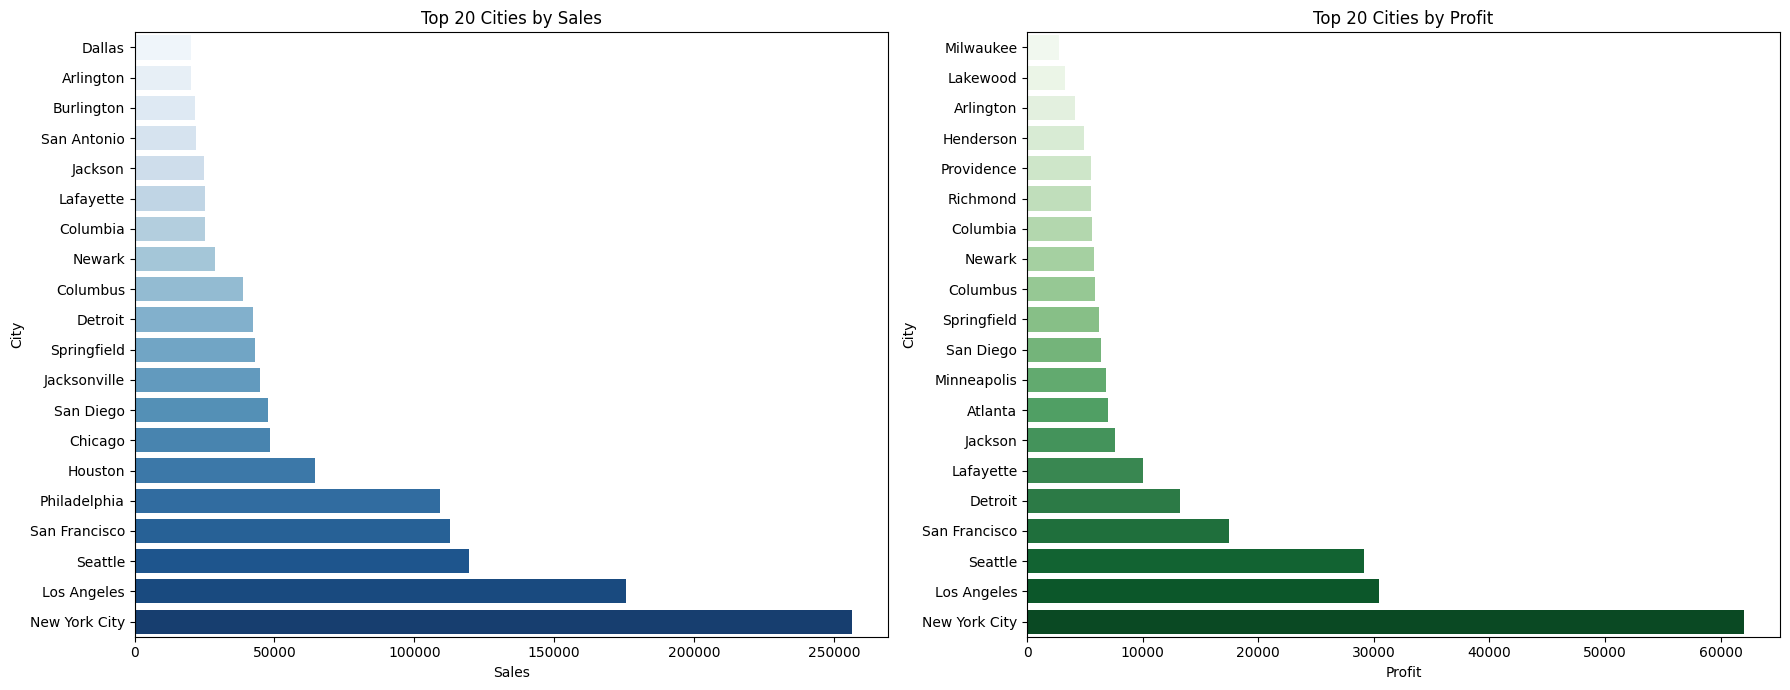

Cities that are in one top list but not the other:
{'Richmond', 'Milwaukee', 'San Antonio', 'Burlington', 'Chicago', 'Jacksonville', 'Minneapolis', 'Houston', 'Dallas', 'Providence', 'Atlanta', 'Henderson', 'Lakewood', 'Philadelphia'}


In [36]:
def top_cities_sales_profit():
    top_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)
    top_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20)

    fig, axes = plt.subplots(1,2, figsize=(18,7))
    sns.barplot(x=top_sales.values, y=top_sales.index, ax=axes[0], palette='Blues_r')
    axes[0].set_title('Top 20 Cities by Sales')
    axes[0].set_xlabel('Sales')
    axes[0].set_ylabel('City')
    axes[0].invert_yaxis()

    sns.barplot(x=top_profit.values, y=top_profit.index, ax=axes[1], palette='Greens_r')
    axes[1].set_title('Top 20 Cities by Profit')
    axes[1].set_xlabel('Profit')
    axes[1].set_ylabel('City')
    axes[1].invert_yaxis()

    plt.tight_layout()
    plt.show()

    print("Cities that are in one top list but not the other:")
    diff = set(top_sales.index) ^ set(top_profit.index)
    print(diff)

top_cities_sales_profit()

This bar chart compares the top 20 cities by sales and profit. On the left, the city with the highest sales is New York City, followed by Los Angeles and Seattle, with sales reaching up to approximately 250,000. Other major cities like San Francisco, Houston, and Chicago also have substantial sales figures. On the right, the city with the highest profit is also New York City, with profits close to 60,000, while Los Angeles and San Francisco follow with notable profit levels. Cities like Seattle and Lafayette also generate significant profit, but overall, New York City leads in both sales and profit. The chart highlights that some cities are top performers in sales but may not have the highest profits, indicating different profit margins across cities.

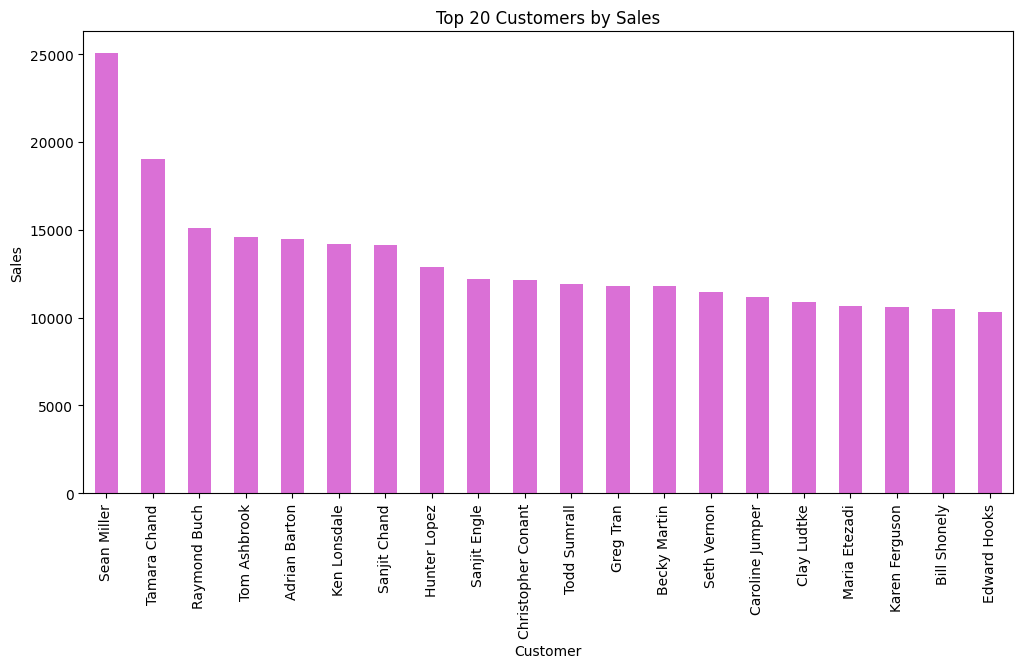

In [94]:
def top_customers_sales():
    top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(20)
    ax = top_customers.plot(kind='bar', figsize=(12,6), color='orchid')
    plt.title('Top 20 Customers by Sales')
    plt.xlabel('Customer')
    plt.ylabel('Sales')
    plt.show()

top_customers_sales()


This bar chart displays the top 20 customers based on sales. Sean Miller has the highest sales, with a figure close to 25,000, making him the top customer. Following him, Tamara Chand and Raymond Buch have significantly lower sales but still rank highly, with sales around 15,000 to 20,000. The remaining customers, including Tom Ashbrook, Adrian Barton, and Ken Lonsdale, have sales figures ranging roughly between 12,000 and 15,000. Overall, the chart shows a steep decline in sales from the top customer to the others, indicating that Sean Miller is a major contributor to sales, while the rest have relatively similar, lower sales levels.

In [13]:
def plot_state_widget():
    state_widget = widgets.Dropdown(options=sorted(df['State'].unique()), description='State:')
    def plot_for_state(state):
        data = df[df['State'] == state].groupby('City')[['Sales','Profit']].sum().sort_values('Sales', ascending=False).head(10)
        data = data[::-1]
        data.plot(kind='bar', figsize=(10,5))
        plt.title(f'Top 10 Cities in {state} (Sales & Profit)')
        plt.xlabel('Amount ($)')
        plt.ylabel('City')
        plt.show()
    widgets.interact(plot_for_state, state=state_widget)

plot_state_widget()

interactive(children=(Dropdown(description='State:', options=('Alabama', 'Arizona', 'Arkansas', 'California', …

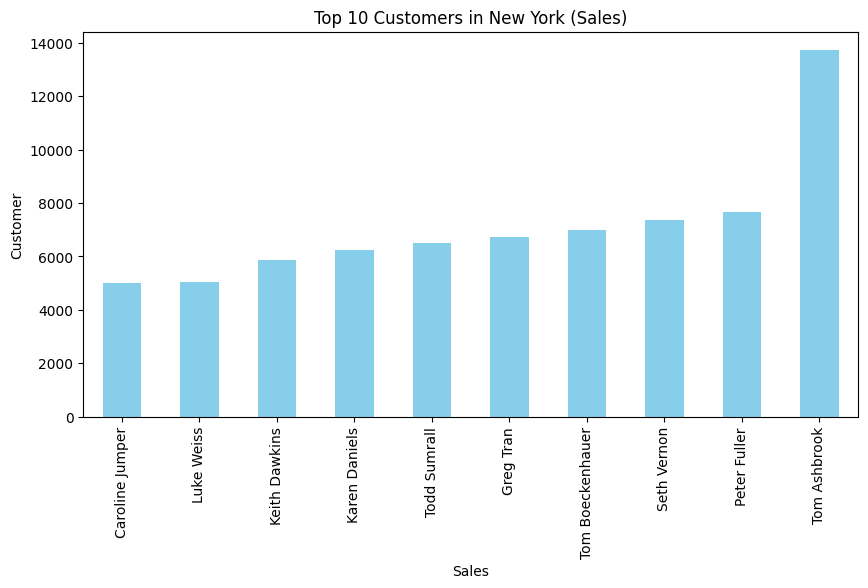

Outstanding customer in New York: Tom Ashbrook with $13723.50 in sales


In [14]:
def outstanding_customer_ny():
    ny_customers = df[df['State'] == 'New York'].groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
    ny_customers = ny_customers[::-1]
    ny_customers.plot(kind='bar', figsize=(10,5), color='skyblue')
    plt.title('Top 10 Customers in New York (Sales)')
    plt.xlabel('Sales')
    plt.ylabel('Customer')
    plt.show()
    top_customer = ny_customers.idxmax()
    print(f"Outstanding customer in New York: {top_customer} with ${ny_customers.max():.2f} in sales")

outstanding_customer_ny()

Customizing Bar Chart: Top 10 Profitable States

Top-Performing Regions and States:
The West and East regions lead in revenue, with California, New York, and Washington at the top for both sales and profit.

/var/folders/xh/330hhznn65g8ndgfy8rh7gkw0000gn/T/ipykernel_97080/3052399300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profit_states.index, y=top_profit_states.values, palette='coolwarm')


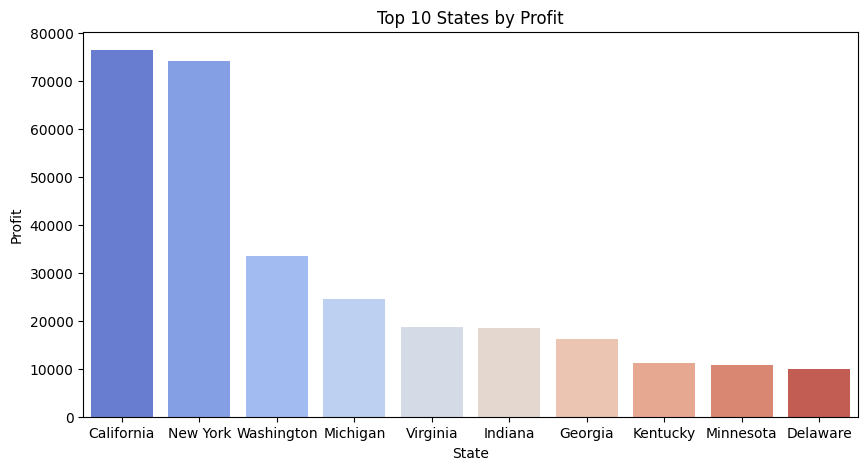

In [71]:
top_profit_states = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_profit_states.index, y=top_profit_states.values, palette='coolwarm')
plt.title('Top 10 States by Profit')
plt.xlabel('State')
plt.ylabel('Profit')
plt.show()


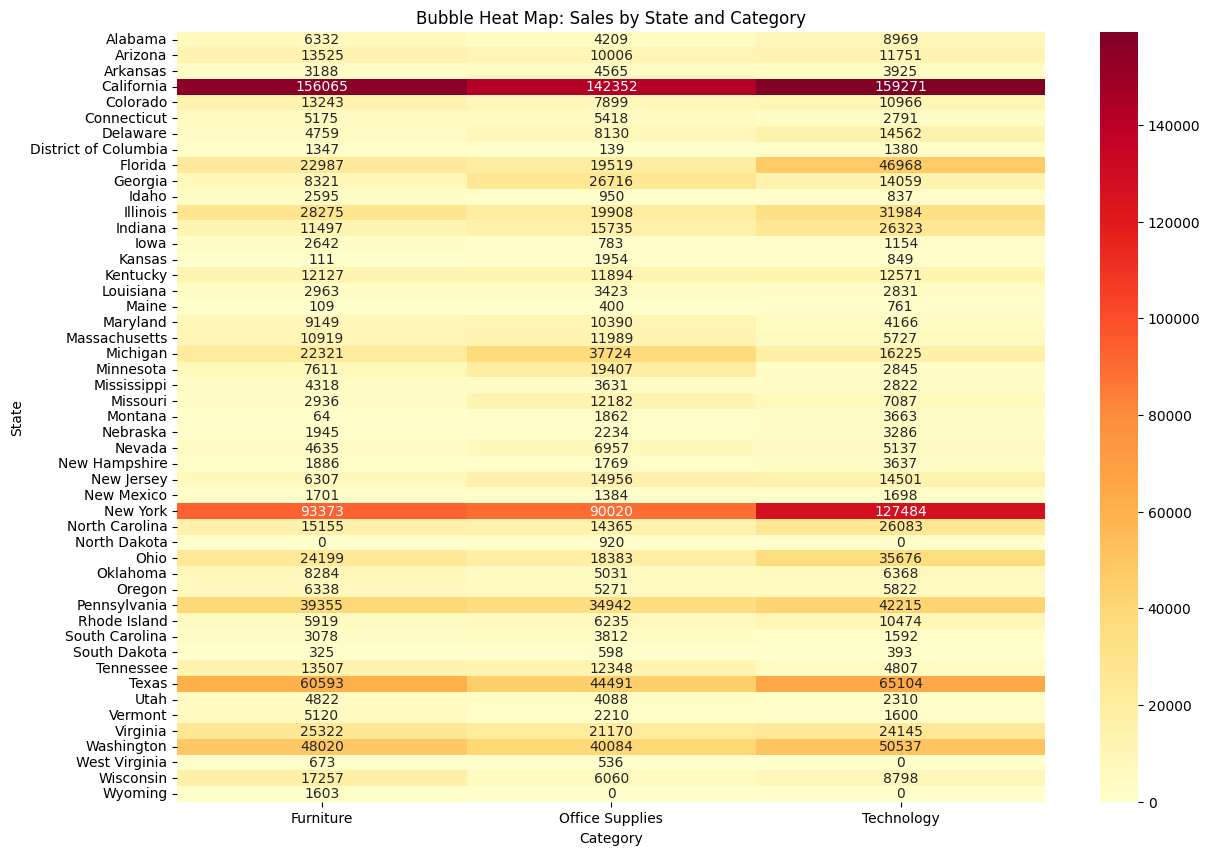

In [43]:
pivot = df.pivot_table(index='State', columns='Category', values='Sales', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14,10))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlOrRd')
plt.title('Bubble Heat Map: Sales by State and Category')
plt.show()

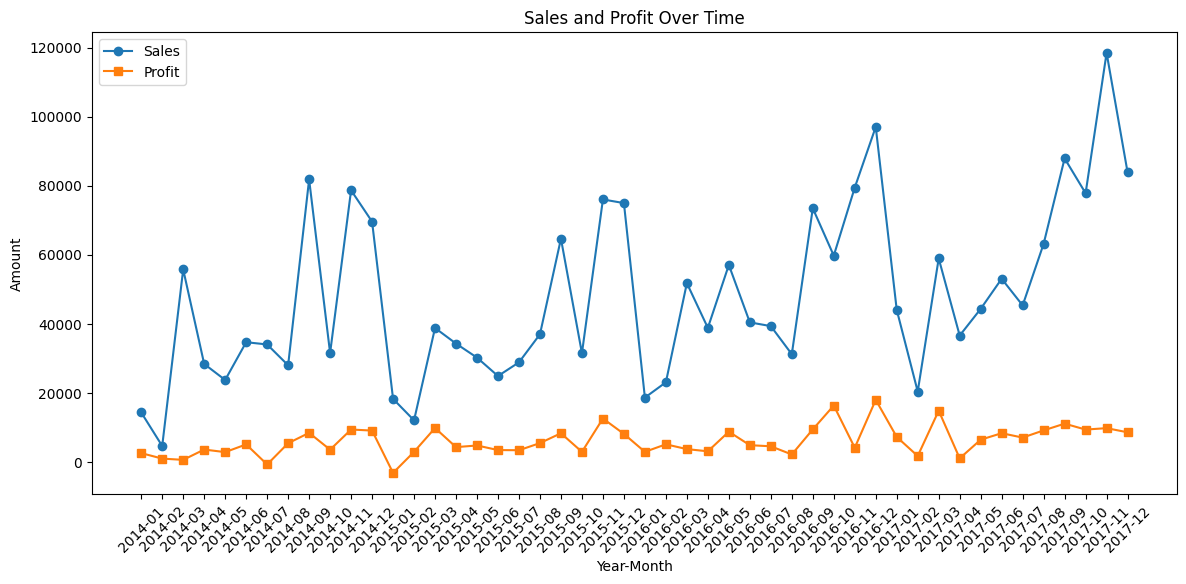

In [15]:
df['YearMonth'] = df['Order Date'].dt.to_period('M')
time_trends = df.groupby('YearMonth')[['Sales', 'Profit']].sum()
plt.figure(figsize=(14,6))
plt.plot(time_trends.index.astype(str), time_trends['Sales'], label='Sales', marker='o')
plt.plot(time_trends.index.astype(str), time_trends['Profit'], label='Profit', marker='s')
plt.title('Sales and Profit Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.show()

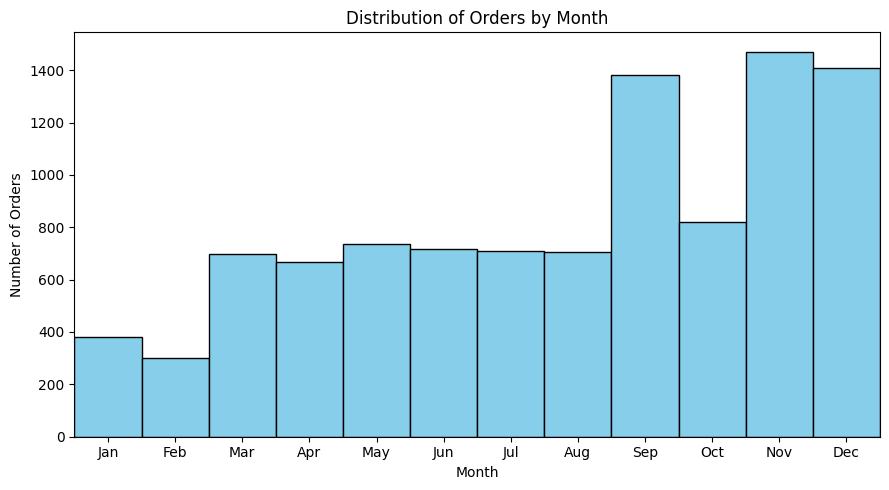

In [104]:
plt.figure(figsize=(9,5))
plt.hist(
    df['Order Date'].dt.month,
    bins=range(1,14),
    color='skyblue',
    edgecolor='black',
    align='left'
)
plt.title('Distribution of Orders by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(
    range(1,13),
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
plt.xlim(0.5, 12.5) 
plt.tight_layout()
plt.show()

Seasonality: If the chart shows clear peaks in certain months, it indicates strong seasonality in customer purchasing behavior. For example, higher order volumes in November and December could be linked to holiday shopping or year-end promotions, while dips in other months may suggest off-peak periods. Business Planning: Identifying the months with the highest order volumes helps with inventory management, staffing, and marketing campaigns. For instance, if orders peak in the summer, you can prepare for increased demand during those months.Trend Analysis: If the distribution is relatively flat, it suggests steady sales throughout the year. However, significant fluctuations indicate that external factors (like holidays, promotions, or product launches) have a strong impact on customer orders. Anomalies: Any unusually high or low months could point to specific events, successful campaigns, or issues (such as supply chain disruptions) that affected order volume.

In [46]:
# Meilleur client à NY
ny_customers = df[df['State'] == 'New York'].groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
print("Meilleur client à New York :", ny_customers.idxmax(), ny_customers.max())

Meilleur client à New York : Tom Ashbrook 13723.498000000001


/var/folders/xh/330hhznn65g8ndgfy8rh7gkw0000gn/T/ipykernel_703/3118337479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette='magma')


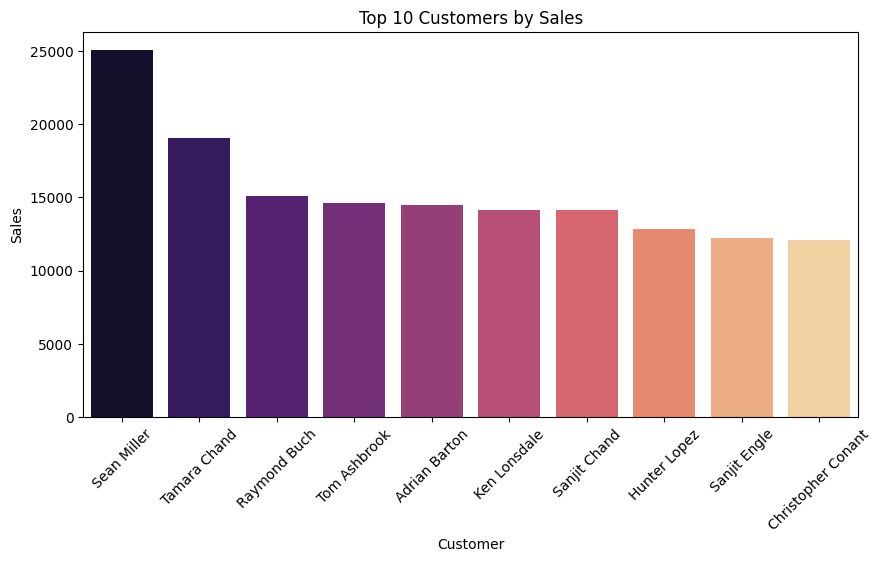

In [105]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='magma')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

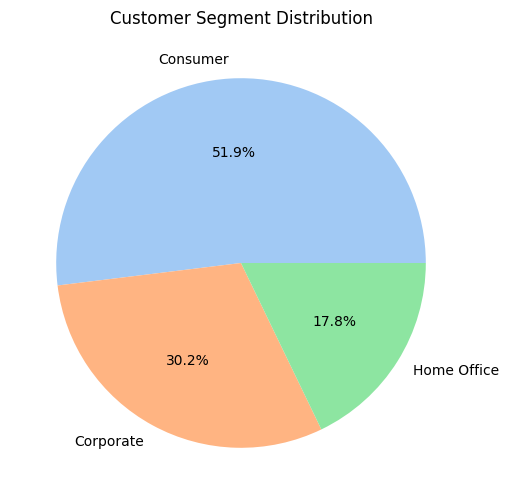

In [49]:
segment_counts = df['Segment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Customer Segment Distribution')
plt.show()

This pie chart illustrates the distribution of customer segments. The largest segment is "Consumer," which accounts for approximately 51.9% of the total, indicating that over half of the customers belong to this category. The "Corporate" segment makes up about 30.2%, representing a significant portion but less than the consumer segment. The smallest segment is "Home Office," comprising roughly 17.8% of the total, indicating a smaller share of customers in this category. Overall, the chart shows that the majority of customers are consumers, with corporate customers also representing a sizable group, and home office customers being the least represented segment.

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Segment', y='Profit', data=df, palette='Set2')
plt.title('Profit Distribution by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.show()

Customer Segments:
The Consumer segment is the largest in terms of purchase volume, but the Corporate or Home Office segments may be more profitable depending on the year.

In [16]:
def plot_top_states(n_states=10):
    data = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(n_states)
    plt.figure(figsize=(10,5))
    sns.barplot(x=data.index, y=data.values, palette='viridis')
    plt.title(f'Top {n_states} States by Sales')
    plt.xlabel('State')
    plt.ylabel('Sales')
    plt.xticks(rotation=90)
    plt.show()

interact(plot_top_states, n_states=widgets.IntSlider(min=5, max=20, step=1, value=10))

interactive(children=(IntSlider(value=10, description='n_states', max=20, min=5), Output()), _dom_classes=('wi…

<function __main__.plot_top_states(n_states=10)>

In [17]:
def plot_heatmap(metric='Sales'):
    pivot = df.pivot_table(index='State', columns='Category', values=metric, aggfunc='sum', fill_value=0)
    plt.figure(figsize=(10,12))
    ax = sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlOrRd')
    plt.title(f'Heatmap of {metric} by State and Category')
    ax.invert_yaxis()
    plt.show()

interact(plot_heatmap, metric=['Sales', 'Profit'])

interactive(children=(Dropdown(description='metric', options=('Sales', 'Profit'), value='Sales'), Output()), _…

<function __main__.plot_heatmap(metric='Sales')>

This pie chart illustrates the distribution of customer segments. The largest segment is "Consumer," which accounts for approximately 51.9% of the total, indicating that over half of the customers belong to this category. The "Corporate" segment makes up about 30.2%, representing a significant portion but less than the consumer segment. The smallest segment is "Home Office," comprising roughly 17.8% of the total, indicating a smaller share of customers in this category. Overall, the chart shows that the majority of customers are consumers, with corporate customers also representing a sizable group, and home office customers being the least represented segment.

In [4]:
def plot_heatmap(metric='Sales'):
    pivot = df.pivot_table(index='State', columns='Category', values=metric, aggfunc='sum', fill_value=0)
    plt.figure(figsize=(10,12))
    ax = sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlOrRd')
    plt.title(f'Heatmap of {metric} by State and Category')
    ax.invert_yaxis()
    plt.show()

interact(plot_heatmap, metric=['Sales', 'Profit'])

NameError: name 'interact' is not defined

This heatmap shows that California, Texas, and New York have the highest sales across all categories. Some states like North Dakota and Wyoming have very low or zero sales, indicating potential markets for growth. Overall, the data highlights key markets and regional sales patterns in the US.

In [18]:
def plot_pairplot(sample_size=300):
    sample = df[['Sales', 'Profit', 'Discount', 'Quantity']].sample(sample_size, random_state=1)
    sns.pairplot(sample, diag_kind='kde')
    plt.suptitle(f'Iris-style Pairplot (Sample size: {sample_size})', y=1.02)
    plt.show()

interact(plot_pairplot, sample_size=widgets.IntSlider(min=100, max=1000, step=100, value=300))

interactive(children=(IntSlider(value=300, description='sample_size', max=1000, min=100, step=100), Output()),…

<function __main__.plot_pairplot(sample_size=300)>

The pairplot shows strong positive correlations between sales, profit, and quantity, indicating that higher sales typically lead to higher profit and larger order quantities. Discount values are mostly low, with some outliers, and appear to have little direct impact on sales and profit. Overall, higher sales and profit are associated with larger quantities, while discounts vary widely.

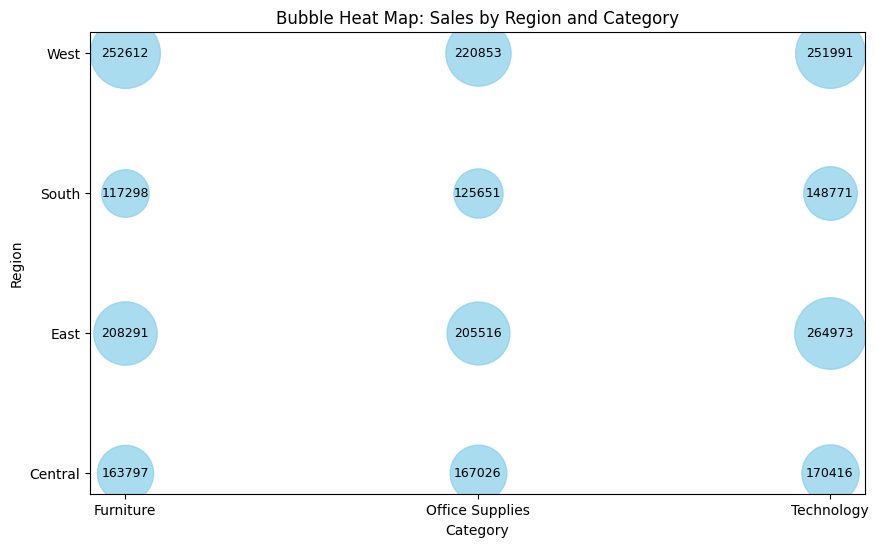

In [19]:
pivot = df.pivot_table(index='Region', columns='Category', values='Sales', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10,6))
for i, region in enumerate(pivot.index):
    for j, category in enumerate(pivot.columns):
        plt.scatter(j, i, s=pivot.loc[region, category]/100, color='skyblue', alpha=0.7)
        plt.text(j, i, f"{int(pivot.loc[region, category])}", ha='center', va='center', fontsize=9)
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.title('Bubble Heat Map: Sales by Region and Category')
plt.xlabel('Category')
plt.ylabel('Region')
plt.show()

/var/folders/xh/330hhznn65g8ndgfy8rh7gkw0000gn/T/ipykernel_703/1818617436.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_state.index, y=profit_state.values, palette='coolwarm')


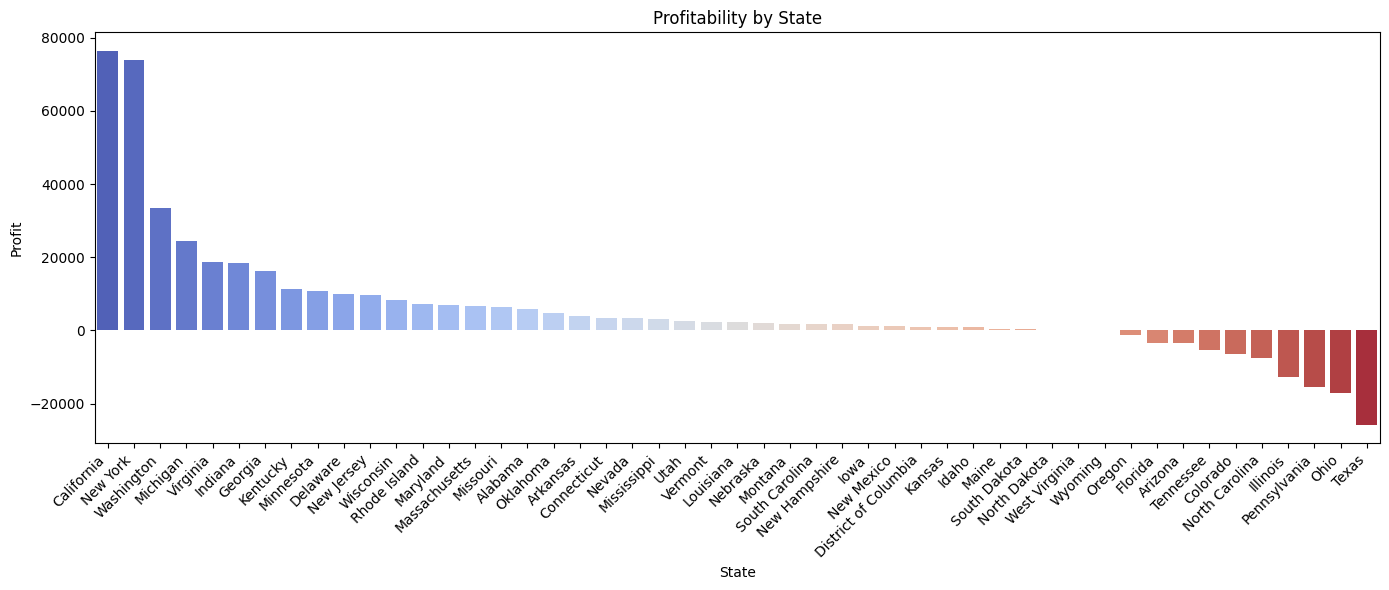

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul de la profitabilité par état
profit_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(x=profit_state.index, y=profit_state.values, palette='coolwarm')
plt.title('Profitability by State')
plt.xlabel('State')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The graph displays the profitability by state, with two distinct trends. On the left side, California, New York, and Washington show high profitability, indicating strong financial performance in these states. As we move to the right, profitability decreases gradually across the states, with some states like Texas, Pennsylvania, and Ohio showing negative profitability, indicating losses. Overall, the graph highlights a significant disparity in profitability levels among states, with some states thriving financially while others experience deficits.

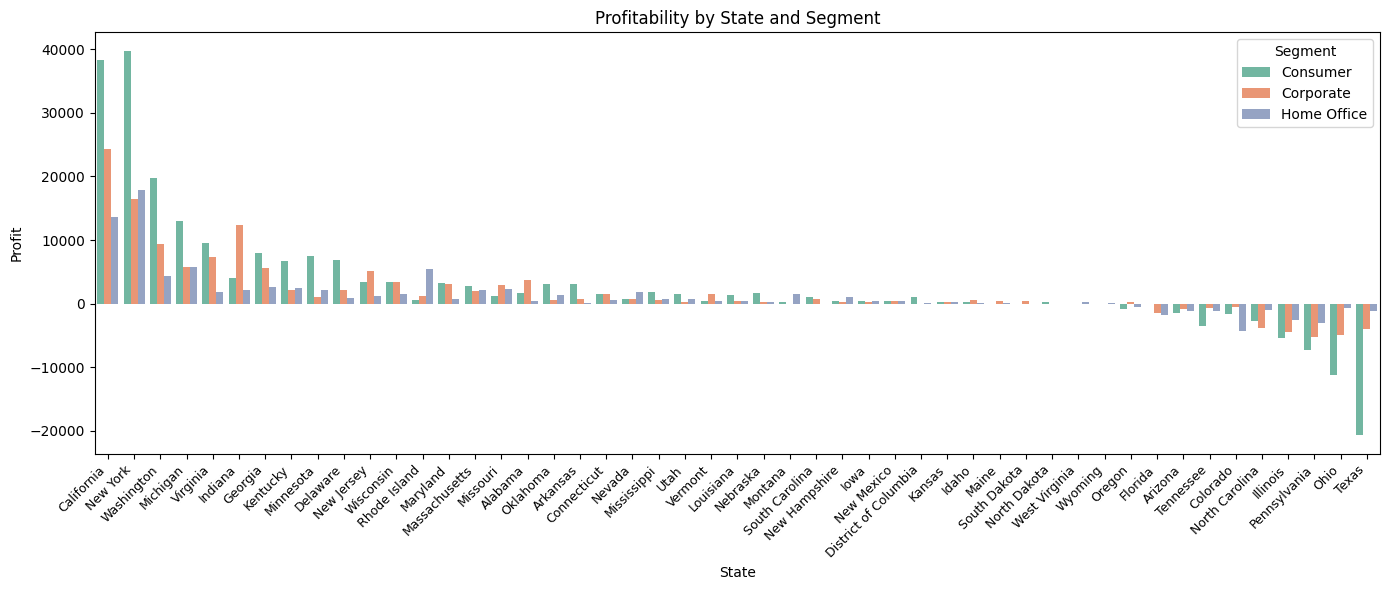

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Regroupement par État et Segment
profit_state_segment = df.groupby(['State', 'Segment'])['Profit'].sum().reset_index()

# Ordonner les États par profit total décroissant
order = df.groupby('State')['Profit'].sum().sort_values(ascending=False).index

plt.figure(figsize=(14, 6))
sns.barplot(
    data=profit_state_segment,
    x='State',
    y='Profit',
    hue='Segment',          
    order=order,
    palette='Set2'           
)
plt.title('Profitability by State and Segment')
plt.xlabel('State')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

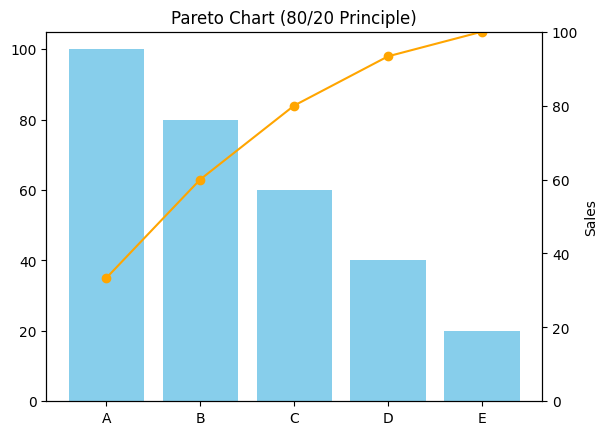

In [41]:
import matplotlib.pyplot as plt

customers = ['A', 'B', 'C', 'D', 'E']
sales = [100, 80, 60, 40, 20]

# Sort data in descending order
customers = [x for _, x in sorted(zip(sales, customers), reverse=True)]
sales.sort(reverse=True)

# Calculate cumulative sales
cumulative_sales = [sum(sales[:i+1]) for i in range(len(sales))]
total_sales = sum(sales)
cumulative_percent = [c / total_sales * 100 for c in cumulative_sales]

# Plot bars for sales
plt.bar(customers, sales, color='skyblue')

# Plot cumulative percentage as a line
plt.twinx()
plt.plot(customers, cumulative_percent, color='orange', marker='o')
plt.ylabel('Cumulative Percentage')
plt.ylim(0, 100)

# Add labels
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.title('Pareto Chart (80/20 Principle)')
plt.show()

The graph shows an inverse relationship between sales and the categories, with sales decreasing as we move from A to E. Meanwhile, the Pareto principle indicates that a small number of categories (A and B) account for the majority of sales.

CONCLUSION

Regional Performance and Profitability: 
California, New York, and Washington are among the top-performing states in sales and profitability, indicating strong regional markets. Conversely, states like North Dakota, Wyoming, and some others exhibit low or zero sales, highlighting potential growth opportunities.There is a significant disparity in profitability across states, with some experiencing losses (negative profitability), emphasizing the need to analyze regional strategies and market conditions.


Market Segmentation and Customer Insights:
The majority of customers are consumers (over 50%), followed by corporate clients, with home office customers being the smallest segment. The top customers, such as Sean Miller, contribute disproportionately to total sales, indicating the importance of key accounts. Sales and Profit Trends:
California consistently outperforms New York in both sales and profit, demonstrating its stronger market position.Major cities like New York City, Los Angeles, and Seattle lead in sales and profit, though profit margins vary, suggesting differing efficiency or market conditions across locations.Seasonal patterns show peaks in certain months, likely due to holiday shopping or promotional periods, which are critical for planning inventory, staffing, and marketing.


Correlation and External Factors:
Strong positive correlations exist between sales, profit, and quantity, implying that larger orders tend to be more profitable.
Discount levels are generally low and have little direct influence on sales or profit, suggesting pricing strategies could be optimized further. Regional Market Potential: States with low or no sales represent untapped markets, which could be targeted for expansion. Understanding regional differences in profitability and sales patterns can help tailor localized strategies.